In [54]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

In [55]:
formats = [
    'Monitor', 
    'frontal', 
    'Maischberger', 
    'Tagesthemen', 
    'maybrit illner', 
    'Markus Lanz', 
    'Frontal 21', 
    'Hart aber fair', 
    'Anne Will',
    ]
formats_name_scheme = {
    'Monitor':'ARD: Monitor',
    'Hart aber fair':'ARD: Hart aber fair',
    'Maischberger':'ARD: Maischberger',
    'Tagesthemen':'ARD: Tagesthemen',
    'Anne Will':'ARD: Anne Will',
    'ARD: YouTube': 'ARD: YouTube',
    'maybrit illner':'ZDF: Maybrit Illner',
    'Markus Lanz':'ZDF: Markus Lanz',
    'frontal':'ZDF: frontal',
    'ZDF: YouTube': 'ZDF: YouTube',
    'Non Public Broadcast':'Non Public Broadcast',
    }
parties = [
    'linke',
    'grüne',
    'spd',
    'fdp',
    'cdu',
    'csu',
    'afd',
    ]

In [56]:
df = pd.read_pickle('../data/sentiment/party_sentiment_classifications.pkl')
df.dropna(inplace=True)

In [57]:
mediathek_df = df[df['medium'].isin(['ARD', 'ZDF'])]
non_public_broadcast_df = df[~df['medium'].isin(['ARD', 'ZDF'])]

In [58]:
mediathek_df['format'] = mediathek_df.apply(lambda row: row.loc['id'] if row.loc['id'] in formats else f'{row.medium}: YouTube', axis=1)
mediathek_df.loc[mediathek_df['format'] == 'Frontal 21', 'format'] = 'frontal'
mediathek_df['format'] = mediathek_df.apply(lambda row: formats_name_scheme[row['format']], axis=1)

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_87145/3013129861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mediathek_df['format'] = mediathek_df.apply(lambda row: row.loc['id'] if row.loc['id'] in formats else f'{row.medium}: YouTube', axis=1)
/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_87145/3013129861.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mediathek_df['format'] = mediathek_df.apply(lambda row: formats_name_scheme[row['format']], axis=1)


In [59]:
mediathek_df['format'].value_counts()

ZDF: YouTube           19992
ZDF: Markus Lanz        1926
ZDF: Maybrit Illner      549
ARD: Maischberger        499
ARD: YouTube             494
ARD: Anne Will           483
ZDF: frontal             435
ARD: Hart aber fair      337
ARD: Monitor             259
ARD: Tagesthemen         255
Name: format, dtype: int64

In [60]:
non_public_broadcast_df['format'] = 'Non Public Broadcast'

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_87145/2906734927.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_public_broadcast_df['format'] = 'Non Public Broadcast'


In [61]:
df = pd.concat([mediathek_df, non_public_broadcast_df])

In [62]:
df.format.value_counts()

Non Public Broadcast    101580
ZDF: YouTube             19992
ZDF: Markus Lanz          1926
ZDF: Maybrit Illner        549
ARD: Maischberger          499
ARD: YouTube               494
ARD: Anne Will             483
ZDF: frontal               435
ARD: Hart aber fair        337
ARD: Monitor               259
ARD: Tagesthemen           255
Name: format, dtype: int64

In [63]:
def a_pivot_df_format_vs_party(input_df):
    output_df = pd.pivot_table(input_df, index='format', columns='party', values='title', aggfunc='count', fill_value=0)
    print(f'\n\nPivoted DF:\n{output_df}')
    return output_df

def b_sort_df_by_political_ideology(input_df):
    output_df = input_df.reindex(list(formats_name_scheme.values()))[parties]
    print(f'\n\nSorted DF:\n{output_df}')
    return output_df

def c_standardize_sentiment_df_by_mention_df(input_df, mention_df):
    output_df = input_df.div(mention_df)
    print(f'\n\nStandardized DF:\n{output_df}')
    return output_df

def d_subtract_df_column_means(input_df):
    output_df = input_df - input_df.mean()
    print(f'\n\nDeviations DF:\n{output_df}')
    return output_df
    
def e_heatmap_plot_df(input_df):
    f, ax = plt.subplots(figsize=(9, 8))
    f.subplots_adjust(left=0.15, bottom=.13, right=.99, top=.89)
    sns.heatmap(input_df, annot=True, linewidths=.5, ax=ax, fmt=".1%", center=np.nanmean(input_df), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())
    return

def f_saveplot_sentiment_short(df, title, path, n_rows_in_title=1):
    from pathlib import Path
    import matplotlib as mpl
    import matplotlib.font_manager as fm
    import matplotlib.pyplot as plt
    mpl.use('pdf')

    fpath = Path(mpl.get_data_path(), "fonts/ttf/cmu_serif_roman.ttf")
    fprop = fm.FontProperties(fname=fpath)

    width = 6.2 #inches
    height = width

    font = {'family':'serif', 'serif': ['cmr10'], 'size':12}
    plt.rc('font',**font)
    plt.rcParams['axes.unicode_minus'] = False
    plt.rc('axes', titlesize=12)
    plt.rc('xtick', labelsize=12)
    plt.rc('ytick', labelsize=12)

    f, ax = plt.subplots(figsize=(9, 8))
    if n_rows_in_title==1:
        f.subplots_adjust(left=0.14, bottom=.14, right=.99, top=.93)
    elif n_rows_in_title==2:
        f.subplots_adjust(left=0.14, bottom=.14, right=.99, top=.88)

    df_to_plot = df.copy()

    sns.heatmap(df_to_plot, annot=True, linewidths=.5, ax=ax, fmt=".1%", center=np.nanmean(df_to_plot), cbar=False, cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed())
    ax.set_xlabel('Party', fontsize=12, font=fpath, color='black')
    ax.set_ylabel('Medium', fontsize=12, font=fpath, color='black')
    ax.set_title(title, fontsize=12, font=fpath, color='black')
    ax.set_xticklabels(['Linke', 'Grüne', 'SPD', 'FDP', 'CDU', 'CSU', 'AfD'], size=12, font=fpath, color='black')
    ax.set_yticklabels(['NDS', 'taz', 'Sp', 'ARD', 'ZDF', 'BR', 'ntv', 'faz', 'WELT', 'BILD', 'CTV'], size=12, font=fpath, color='black')

    
    f.set_size_inches(width, height*11/21)
    f.savefig(path)

In [64]:
party_mentions = b_sort_df_by_political_ideology(a_pivot_df_format_vs_party(df))
party_mentions.to_pickle('../data/mentions/party_mentions_mediathek.pkl')



Pivoted DF:
party                  afd    cdu   csu    fdp  grüne  linke    spd  trump
format                                                                    
ARD: Anne Will          19     82    20    117     64     14    166      1
ARD: Hart aber fair     15     47    16     97     58     11     93      0
ARD: Maischberger       23     94    38     89     64     20    145     26
ARD: Monitor            48     71    31     11     31      1     47     19
ARD: Tagesthemen        31     57     9     59     26      4     50     19
ARD: YouTube           157    102    24     54     26      9     73     49
Non Public Broadcast  8255  22674  8927  15011   8076   3716  23218  11703
ZDF: Markus Lanz       112    509   151    350    189     94    457     64
ZDF: Maybrit Illner      9    142    36    123     73     15    149      2
ZDF: YouTube          2279   4285  1350   3418   1578    999   4335   1748
ZDF: frontal           110     94    39     47     40      6     75     24


Sorted DF

In [65]:
def sentiment_analysis_pipeline(classification_df, mention_df):
    pivoted_df = a_pivot_df_format_vs_party(classification_df)
    sorted_df = b_sort_df_by_political_ideology(pivoted_df)
    standardized_df = c_standardize_sentiment_df_by_mention_df(sorted_df, mention_df=mention_df)
    deviaton_df = d_subtract_df_column_means(standardized_df)
    e_heatmap_plot_df(standardized_df)
    e_heatmap_plot_df(deviaton_df)
    return standardized_df, deviaton_df

In [66]:
mediathek_positive_classifications = df[df['positive']]
mediathek_neutral_classifications = df[df['neutral']]
mediathek_negative_classifications = df[df['negative']]



Pivoted DF:
party                 afd   cdu   csu   fdp  grüne  linke   spd  trump
format                                                                
ARD: Anne Will          3     9     0    15      5      2    21      0
ARD: Hart aber fair     0     5     0     9      6      0    13      0
ARD: Maischberger       0    12     5    10      7      1    13      2
ARD: Monitor            7     6     3     1      1      0     5      2
ARD: Tagesthemen        2     9     0     6      1      0     2      3
ARD: YouTube           14     3     1     1      4      0     4      3
Non Public Broadcast  825  3552  1615  2104   1243    460  3460    756
ZDF: Markus Lanz       10    60    21    33     26     11    47      1
ZDF: Maybrit Illner     1    18     8     9      7      1    16      0
ZDF: YouTube          228   619   219   512    250    112   740     95
ZDF: frontal            5     9     4     5      4      1     4      3


Sorted DF:
party                 linke  grüne   spd   fdp   c

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_87145/636786566.py:22: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()
/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  func(*args, **kwargs)
/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


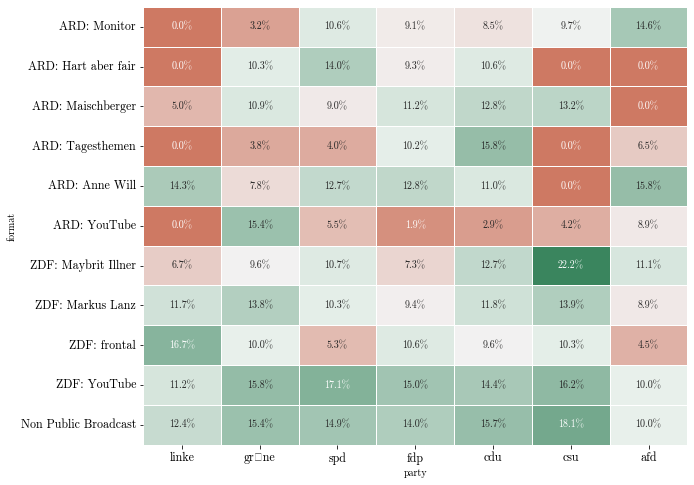

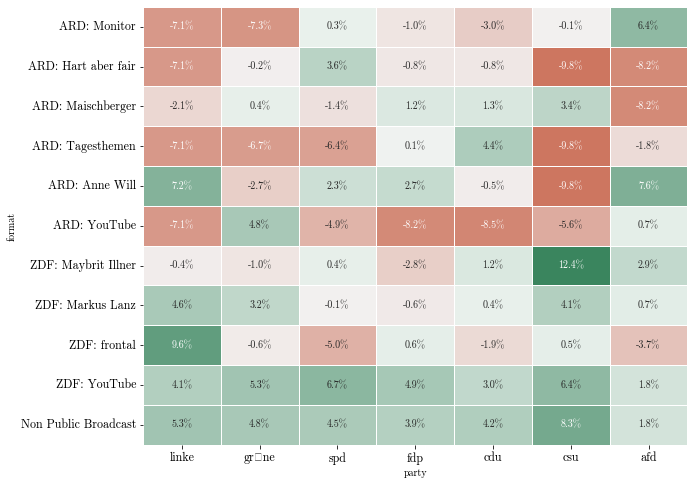

In [67]:
mediathek_positive_classifications_standardized, mediathek_positive_classifications_deviations = sentiment_analysis_pipeline(mediathek_positive_classifications, party_mentions)



Pivoted DF:
party                  afd   cdu   csu   fdp  grüne  linke   spd  trump
format                                                                 
ARD: Anne Will           2    24    14    39     22      5    50      0
ARD: Hart aber fair      5    16     7    39     17      7    27      0
ARD: Maischberger        8    31    11    30     22      3    46      9
ARD: Monitor            19    20    10     4     12      1    15      9
ARD: Tagesthemen         6    15     1    22     11      1    18     11
ARD: YouTube            37    36    11    16      3      0    20     19
Non Public Broadcast  3136  9205  3606  5579   2940   1460  8094   7515
ZDF: Markus Lanz        18   156    59    77     41     30   109     33
ZDF: Maybrit Illner      2    37    13    35     17      5    47      1
ZDF: YouTube           826  1656   534  1188    566    376  1501   1073
ZDF: frontal            30    40    18    13      9      0    16     11


Sorted DF:
party                 linke  grüne   

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_87145/636786566.py:22: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()
/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  func(*args, **kwargs)
/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


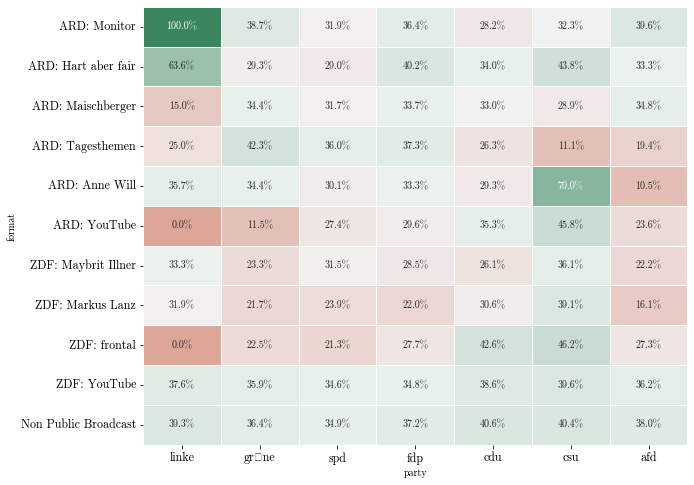

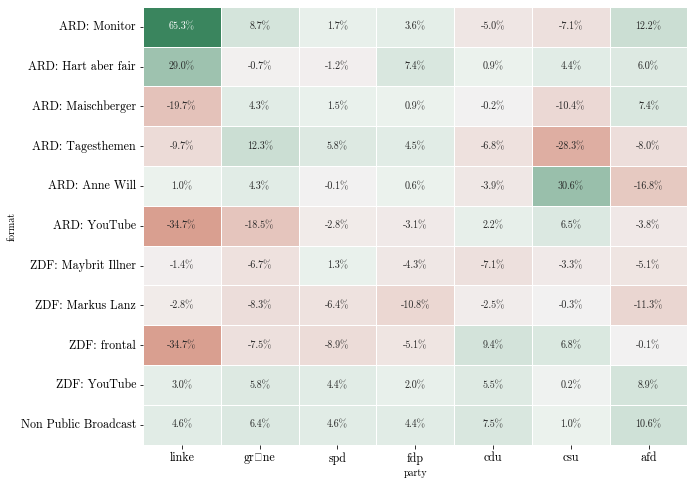

In [68]:
mediathek_neutral_classifications_standardized, mediathek_neutral_classifications_deviations = sentiment_analysis_pipeline(mediathek_neutral_classifications, party_mentions)



Pivoted DF:
party                  afd   cdu   csu   fdp  grüne  linke    spd  trump
format                                                                  
ARD: Anne Will          14    49     6    63     37      7     95      1
ARD: Hart aber fair     10    26     9    49     35      4     53      0
ARD: Maischberger       15    51    22    49     35     16     86     15
ARD: Monitor            22    45    18     6     18      0     27      8
ARD: Tagesthemen        23    33     8    31     14      3     30      5
ARD: YouTube           106    63    12    37     19      9     49     27
Non Public Broadcast  4294  9917  3706  7328   3893   1796  11664   3432
ZDF: Markus Lanz        84   293    71   240    122     53    301     30
ZDF: Maybrit Illner      6    87    15    79     49      9     86      1
ZDF: YouTube          1225  2010   597  1718    762    511   2094    580
ZDF: frontal            75    45    17    29     27      5     55     10


Sorted DF:
party                 li

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_87145/636786566.py:22: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, ax = plt.subplots(figsize=(9, 8))
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()
/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  func(*args, **kwargs)
/Users/hs/miniforge3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


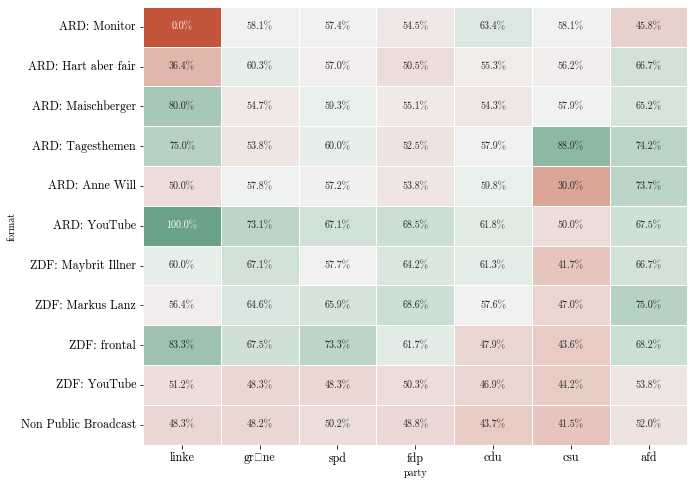

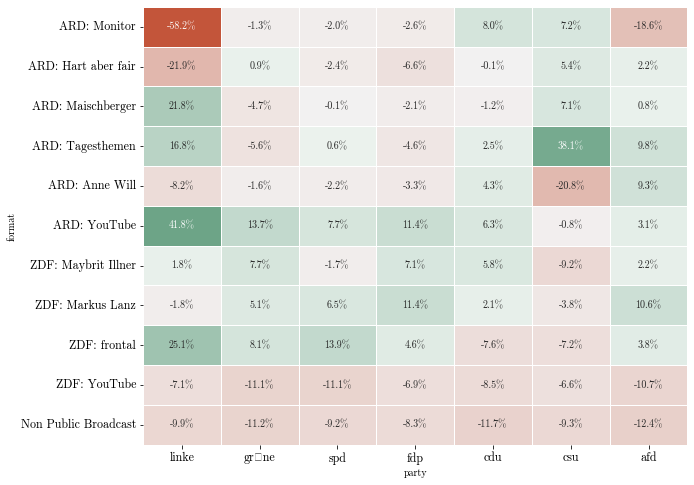

In [69]:
mediathek_negative_classifications_standardized, mediathek_negative_classifications_deviations = sentiment_analysis_pipeline(mediathek_negative_classifications, party_mentions)

In [70]:
party_mentions

party,linke,grüne,spd,fdp,cdu,csu,afd
format,,,,,,,
ARD: Monitor,1,31,47,11,71,31,48
ARD: Hart aber fair,11,58,93,97,47,16,15
ARD: Maischberger,20,64,145,89,94,38,23
ARD: Tagesthemen,4,26,50,59,57,9,31
ARD: Anne Will,14,64,166,117,82,20,19
ARD: YouTube,9,26,73,54,102,24,157
ZDF: Maybrit Illner,15,73,149,123,142,36,9
ZDF: Markus Lanz,94,189,457,350,509,151,112
ZDF: frontal,6,40,75,47,94,39,110


In [71]:
pos_data_basis = b_sort_df_by_political_ideology(a_pivot_df_format_vs_party(df[df['positive']]))
neu_data_basis = b_sort_df_by_political_ideology(a_pivot_df_format_vs_party(df[df['neutral']]))
neg_data_basis = b_sort_df_by_political_ideology(a_pivot_df_format_vs_party(df[df['negative']]))



Pivoted DF:
party                 afd   cdu   csu   fdp  grüne  linke   spd  trump
format                                                                
ARD: Anne Will          3     9     0    15      5      2    21      0
ARD: Hart aber fair     0     5     0     9      6      0    13      0
ARD: Maischberger       0    12     5    10      7      1    13      2
ARD: Monitor            7     6     3     1      1      0     5      2
ARD: Tagesthemen        2     9     0     6      1      0     2      3
ARD: YouTube           14     3     1     1      4      0     4      3
Non Public Broadcast  825  3552  1615  2104   1243    460  3460    756
ZDF: Markus Lanz       10    60    21    33     26     11    47      1
ZDF: Maybrit Illner     1    18     8     9      7      1    16      0
ZDF: YouTube          228   619   219   512    250    112   740     95
ZDF: frontal            5     9     4     5      4      1     4      3


Sorted DF:
party                 linke  grüne   spd   fdp   c

In [72]:
pos_data_basis

party,linke,grüne,spd,fdp,cdu,csu,afd
format,,,,,,,
ARD: Monitor,0,1,5,1,6,3,7
ARD: Hart aber fair,0,6,13,9,5,0,0
ARD: Maischberger,1,7,13,10,12,5,0
ARD: Tagesthemen,0,1,2,6,9,0,2
ARD: Anne Will,2,5,21,15,9,0,3
ARD: YouTube,0,4,4,1,3,1,14
ZDF: Maybrit Illner,1,7,16,9,18,8,1
ZDF: Markus Lanz,11,26,47,33,60,21,10
ZDF: frontal,1,4,4,5,9,4,5


In [73]:
neu_data_basis

party,linke,grüne,spd,fdp,cdu,csu,afd
format,,,,,,,
ARD: Monitor,1,12,15,4,20,10,19
ARD: Hart aber fair,7,17,27,39,16,7,5
ARD: Maischberger,3,22,46,30,31,11,8
ARD: Tagesthemen,1,11,18,22,15,1,6
ARD: Anne Will,5,22,50,39,24,14,2
ARD: YouTube,0,3,20,16,36,11,37
ZDF: Maybrit Illner,5,17,47,35,37,13,2
ZDF: Markus Lanz,30,41,109,77,156,59,18
ZDF: frontal,0,9,16,13,40,18,30


In [74]:
neg_data_basis

party,linke,grüne,spd,fdp,cdu,csu,afd
format,,,,,,,
ARD: Monitor,0,18,27,6,45,18,22
ARD: Hart aber fair,4,35,53,49,26,9,10
ARD: Maischberger,16,35,86,49,51,22,15
ARD: Tagesthemen,3,14,30,31,33,8,23
ARD: Anne Will,7,37,95,63,49,6,14
ARD: YouTube,9,19,49,37,63,12,106
ZDF: Maybrit Illner,9,49,86,79,87,15,6
ZDF: Markus Lanz,53,122,301,240,293,71,84
ZDF: frontal,5,27,55,29,45,17,75


/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_87145/3604947628.py:20: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, axs = plt.subplots(1,3,sharey=True)
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


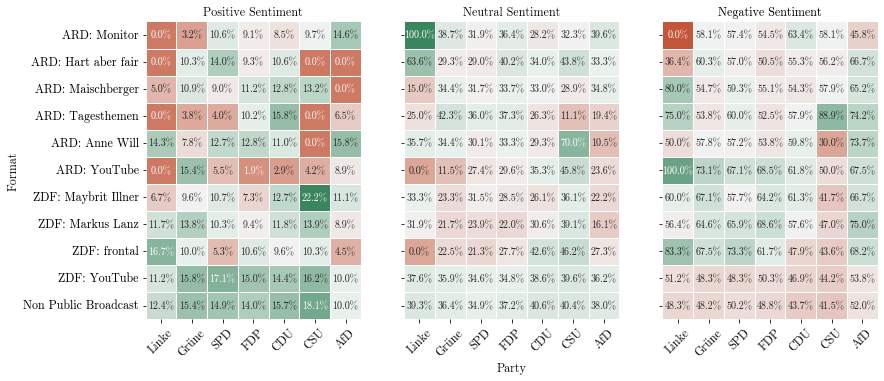

In [75]:
from pathlib import Path
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import matplotlib as mpl
mpl.use('pdf')
fpath = Path(mpl.get_data_path(), "fonts/ttf/cmu_serif_roman.ttf")
fprop = fm.FontProperties(fname=fpath)

width = 12.4 #inches
height = width/2.4

font = {'family':'serif', 'serif': ['cmr10']}
plt.rc('font',**font)
plt.rcParams['axes.unicode_minus'] = False
plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

f, axs = plt.subplots(1,3,sharey=True)
f.subplots_adjust(left=0.16, bottom=.15, right=.98, top=.95)

pos = mediathek_positive_classifications_standardized.copy()
neu = mediathek_neutral_classifications_standardized.copy()
neg = mediathek_negative_classifications_standardized.copy()

sns.heatmap(pos, annot=True, linewidths=.5, ax=axs[0], fmt=".1%", center=np.nanmean(pos), cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed(), cbar=False)
sns.heatmap(neu, annot=True, linewidths=.5, ax=axs[1], fmt=".1%", center=np.nanmean(neu), cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed(), cbar=False)
sns.heatmap(neg, annot=True, linewidths=.5, ax=axs[2], fmt=".1%", center=np.nanmean(neg), cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed(), cbar=False)
axs[0].set_xlabel('')
axs[0].set_ylabel('Format', size=12, font=fpath, color='black')
axs[0].set_title('Positive Sentiment', size=12, font=fpath, color='black')
axs[1].set_xlabel('Party', size=12, font=fpath, color='black')
axs[1].set_ylabel('')
axs[1].set_title('Neutral Sentiment', size=12, font=fpath, color='black')
axs[2].set_title('Negative Sentiment')
axs[2].set_xlabel('')
axs[2].set_ylabel('')
axs[0].set_xticklabels(['Linke', 'Grüne', 'SPD', 'FDP', 'CDU', 'CSU', 'AfD'], size=12, font=fpath, color='black', rotation=45)
axs[1].set_xticklabels(['Linke', 'Grüne', 'SPD', 'FDP', 'CDU', 'CSU', 'AfD'], size=12, font=fpath, color='black', rotation=45)
axs[2].set_xticklabels(['Linke', 'Grüne', 'SPD', 'FDP', 'CDU', 'CSU', 'AfD'], size=12, font=fpath, color='black', rotation=45)
#axs[0].set_yticklabels(['ARD: Monitor', 'ARD: Hart aber fair', 'ARD: Maischberger', 'ARD: Tagesthemen', 'ARD: Anne Will', 'ARD: YouTube', 'ZDF: Maybrit Illner', 'ZDF: Markus Lanz', 'ZDF: Frontal 21', 'ZDF: Frontal', 'ZDF: YouTube', 'ZDFheute: YouTube', 'Non Public Broadcast'], size=12, font=fpath, color='black')
f.set_size_inches(width, height)
f.savefig('../results/englisch/sentiment_mediathek.pdf')


/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_87145/1178431493.py:20: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, axs = plt.subplots(1,2,sharey=True)
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


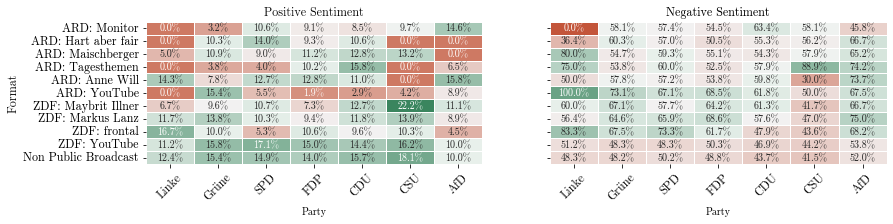

In [76]:
from pathlib import Path
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import matplotlib as mpl
mpl.use('pdf')
fpath = Path(mpl.get_data_path(), "fonts/ttf/cmu_serif_roman.ttf")
fprop = fm.FontProperties(fname=fpath)

width = 12.4 #inches
height = width/2.4

font = {'family':'serif', 'serif': ['cmr10']}
plt.rc('font',**font)
plt.rcParams['axes.unicode_minus'] = False
plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

f, axs = plt.subplots(1,2,sharey=True)
f.subplots_adjust(left=0.16, bottom=.25, right=.99, top=.92)

pos = mediathek_positive_classifications_standardized.copy()
neg = mediathek_negative_classifications_standardized.copy()

sns.heatmap(pos, annot=True, linewidths=.5, ax=axs[0], fmt=".1%", center=np.nanmean(pos), cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed(), cbar=False)
sns.heatmap(neg, annot=True, linewidths=.5, ax=axs[1], fmt=".1%", center=np.nanmean(neg), cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed(), cbar=False)
axs[0].set_xlabel('Party')
axs[0].set_ylabel('Format', size=12, font=fpath, color='black')
axs[0].set_title('Positive Sentiment', size=12, font=fpath, color='black')
axs[1].set_title('Negative Sentiment')
axs[1].set_xlabel('Party')
axs[1].set_ylabel('')
axs[0].set_xticklabels(['Linke', 'Grüne', 'SPD', 'FDP', 'CDU', 'CSU', 'AfD'], size=12, font=fpath, color='black', rotation=45)
axs[1].set_xticklabels(['Linke', 'Grüne', 'SPD', 'FDP', 'CDU', 'CSU', 'AfD'], size=12, font=fpath, color='black', rotation=45)
#axs[0].set_yticklabels(['ARD: Monitor', 'ARD: Hart aber fair', 'ARD: Maischberger', 'ARD: Tagesthemen', 'ARD: Anne Will', 'ARD: YouTube', 'ZDF: Maybrit Illner', 'ZDF: Markus Lanz', 'ZDF: Frontal 21', 'ZDF: Frontal', 'ZDF: YouTube', 'ZDFheute: YouTube', 'Non Public Broadcast'], size=12, font=fpath, color='black')
f.set_size_inches(width, height*12/21)
f.savefig('../results/englisch/sentiment_mediathek_without_neutral.pdf')


In [77]:
def subset_df_by_format(df):
    subset_magazines = df.loc[['ARD: Monitor', 'ARD: Tagesthemen', 'ZDF: frontal']].mean()
    subset_talk = df.loc[['ARD: Hart aber fair', 'ARD: Maischberger', 'ARD: Anne Will', 'ZDF: Maybrit Illner', 'ZDF: Markus Lanz']].mean()
    subset_combined = df.drop(index=['ARD: YouTube', 'ZDF: YouTube', 'Non Public Broadcast']).mean()
    subset_df = pd.concat([subset_magazines, subset_talk, subset_combined], axis=1).T
    subset_df.index = ['Magazines', 'Talkshows', 'Combined']
    return subset_df

/var/folders/k5/jm1h82sn2vd8d4f_0f1091r00000gn/T/ipykernel_87145/2983775798.py:20: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  f, axs = plt.subplots(1,3,sharey=True)
/Users/hs/miniforge3/lib/python3.9/site-packages/seaborn/utils.py:95: UserWarning: Glyph 252 (\N{LATIN SMALL LETTER U WITH DIAERESIS}) missing from current font.
  fig.canvas.draw()


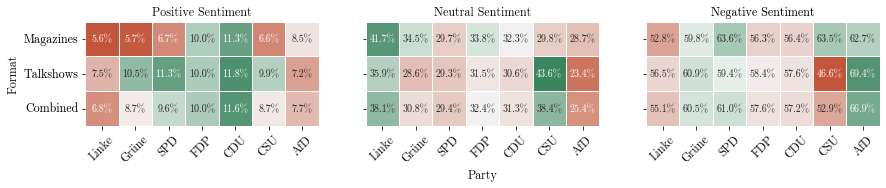

In [106]:
from pathlib import Path
import matplotlib.font_manager as fm
import matplotlib.ticker as mtick
import matplotlib.patches as mpatches
import matplotlib as mpl
mpl.use('pdf')
fpath = Path(mpl.get_data_path(), "fonts/ttf/cmu_serif_roman.ttf")
fprop = fm.FontProperties(fname=fpath)

width = 12.4 #inches
height = width/2.4

font = {'family':'serif', 'serif': ['cmr10']}
plt.rc('font',**font)
plt.rcParams['axes.unicode_minus'] = False
plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

f, axs = plt.subplots(1,3,sharey=True)
f.subplots_adjust(left=0.1, bottom=.32, right=.99, top=.91)

pos_subset = subset_df_by_format(pos)
neu_subset = subset_df_by_format(neu)
neg_subset = subset_df_by_format(neg)

sns.heatmap(pos_subset, annot=True, linewidths=.5, ax=axs[0], fmt=".1%", center=np.nanmean(pos_subset), cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed(), cbar=False)
sns.heatmap(neu_subset, annot=True, linewidths=.5, ax=axs[1], fmt=".1%", center=np.nanmean(neu_subset), cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed(), cbar=False)
sns.heatmap(neg_subset, annot=True, linewidths=.5, ax=axs[2], fmt=".1%", center=np.nanmean(neg_subset), cmap=sns.diverging_palette(145, 20, as_cmap=True).reversed(), cbar=False)
axs[0].set_xlabel('')
axs[0].set_ylabel('Format', size=12, font=fpath, color='black')
axs[0].set_title('Positive Sentiment', size=12, font=fpath, color='black')
axs[1].set_xlabel('Party', size=12, font=fpath, color='black')
axs[1].set_ylabel('')
axs[1].set_title('Neutral Sentiment', size=12, font=fpath, color='black')
axs[2].set_title('Negative Sentiment')
axs[2].set_xlabel('')
axs[2].set_ylabel('')
axs[0].set_xticklabels(['Linke', 'Grüne', 'SPD', 'FDP', 'CDU', 'CSU', 'AfD'], size=12, font=fpath, color='black', rotation=45)
axs[1].set_xticklabels(['Linke', 'Grüne', 'SPD', 'FDP', 'CDU', 'CSU', 'AfD'], size=12, font=fpath, color='black', rotation=45)
axs[2].set_xticklabels(['Linke', 'Grüne', 'SPD', 'FDP', 'CDU', 'CSU', 'AfD'], size=12, font=fpath, color='black', rotation=45)
axs[0].set_yticklabels(axs[0].get_yticklabels(), rotation=0)
#axs[0].set_yticklabels(['ARD: Monitor', 'ARD: Hart aber fair', 'ARD: Maischberger', 'ARD: Tagesthemen', 'ARD: Anne Will', 'ARD: YouTube', 'ZDF: Maybrit Illner', 'ZDF: Markus Lanz', 'ZDF: Frontal 21', 'ZDF: Frontal', 'ZDF: YouTube', 'ZDFheute: YouTube', 'Non Public Broadcast'], size=12, font=fpath, color='black')
f.set_size_inches(width, height*10/21)
f.savefig('../results/englisch/sentiment_mediathek_subsets.pdf')


In [85]:
def sample_mentions(format, sentiment, n):
    return df.loc[(df.format == format) & df[sentiment]].sample(n=n)

In [80]:
test = sample_mentions(format='ARD: Monitor', sentiment='positive', n=20)

In [81]:
test123 = test[test['party'] == 'afd']